# Outline
* Purpose: Multi-class image segmentation

# Importing modules

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import segmentation_models_pytorch as smp
from segmentation_models_pytorch import utils
import torch
from torch.utils.data import DataLoader

In [2]:
from multi_class_image_segmentation import CLASSES, COLOR_PALETTE, DEVICE, MaterialDataset, get_augmentation, get_list_img, get_preprocessing, visualize

# Defining variables

In [3]:
# ENCODER = 'efficientnet-b4'
# ENCODER = 'se_resnext50_32x4d'
# ENCODER = 'timm-mobilenetv3_large_075'
# ENCODER = 'vgg11'
ENCODER = 'vgg16'
# ENCODER = 'vgg19'
# ENCODER = 'vgg19_bn'

ENCODER_WEIGHTS = 'imagenet'

ACTIVATION = 'softmax2d'
# ACTIVATION = 'sigmoid'

BATCH_SIZE = 8

PREDICT_CLASS = [
    'background',
    'asufalt',
    'bigrock',
    'glass',
    'renga',
    'rockmid',
    'rocksmall',
]

# Preparing data

In [4]:
# encoderに合わせた前処理の取得
preprocessing_fn = smp.encoders.get_preprocessing_fn(ENCODER, ENCODER_WEIGHTS)

# データ周りを格納する辞書
data_info = {}
rootpath = r'./data/train/'

for phase in ['train', 'val']:
    data_info[f'{phase}_img_path'] = get_list_img(f'{rootpath}/images/division-1')
    data_info[f'{phase}_mask_path'] = get_list_img(f'{rootpath}/masks/division-1', ext='png')
    
    # Dataset
    data_info[f'{phase}_dataset'] = MaterialDataset(
            data_info[f'{phase}_img_path'], 
            data_info[f'{phase}_mask_path'], 
            classes=PREDICT_CLASS,
            augmentation=get_augmentation(phase), 
            preprocessing=get_preprocessing(preprocessing_fn)
            )

    # DataLoader
    shuffle = True if phase == 'train' else False
    data_info[f'{phase}_dataloader'] = DataLoader(
        data_info[f'{phase}_dataset'], 
        batch_size=BATCH_SIZE, 
        shuffle=shuffle)


/home/vscode/.local/lib/python3.11/site-packages/albumentations/imgaug/transforms.py:261: FutureWarning: IAAAdditiveGaussianNoise is deprecated. Please use GaussNoise instead
  warnings.warn("IAAAdditiveGaussianNoise is deprecated. Please use GaussNoise instead", FutureWarning)
/home/vscode/.local/lib/python3.11/site-packages/albumentations/imgaug/transforms.py:384: FutureWarning: This IAAPerspective is deprecated. Please use Perspective instead
  warnings.warn("This IAAPerspective is deprecated. Please use Perspective instead", FutureWarning)
/home/vscode/.local/lib/python3.11/site-packages/albumentations/augmentations/transforms.py:1258: FutureWarning: This class has been deprecated. Please use RandomBrightnessContrast
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/albumentations/imgaug/transforms.py:231: FutureWarning: IAASharpen is deprecated. Please use Sharpen instead
  warnings.warn("IAASharpen is deprecated. Please use Sharpen instead", FutureWarning)
/home/v

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


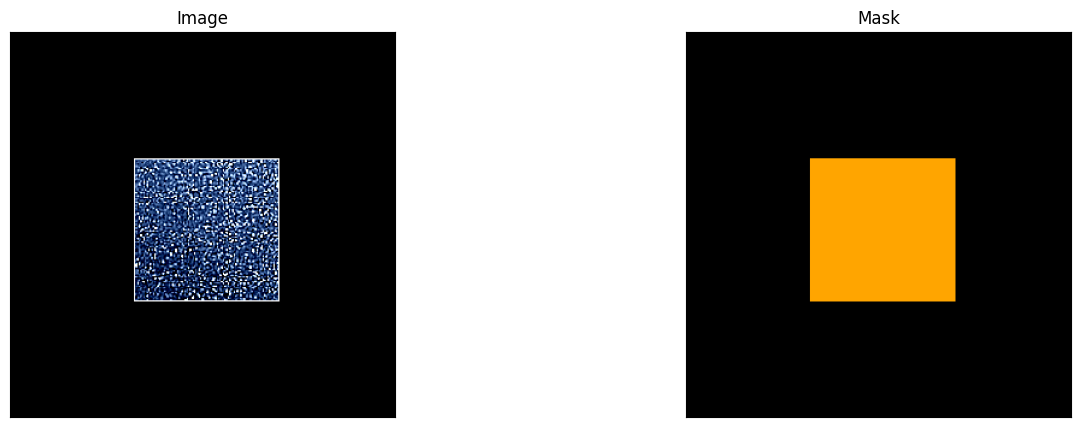

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


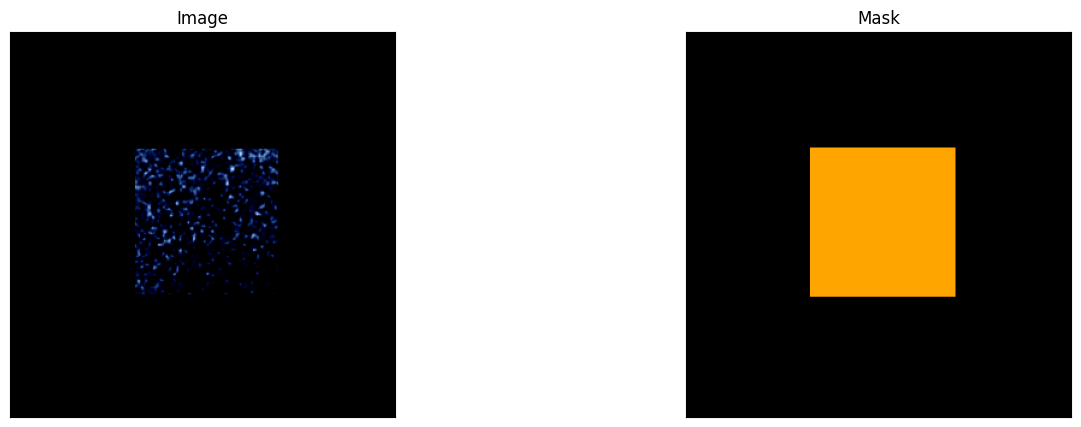

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


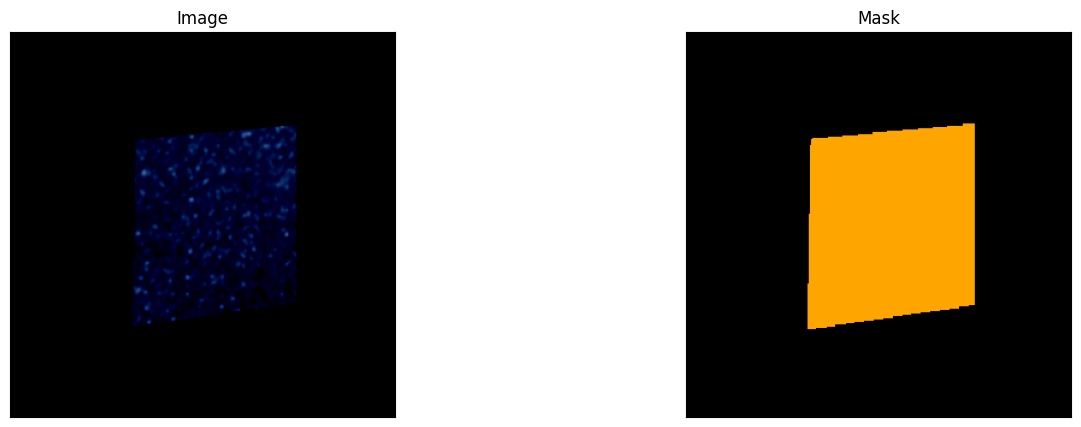

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


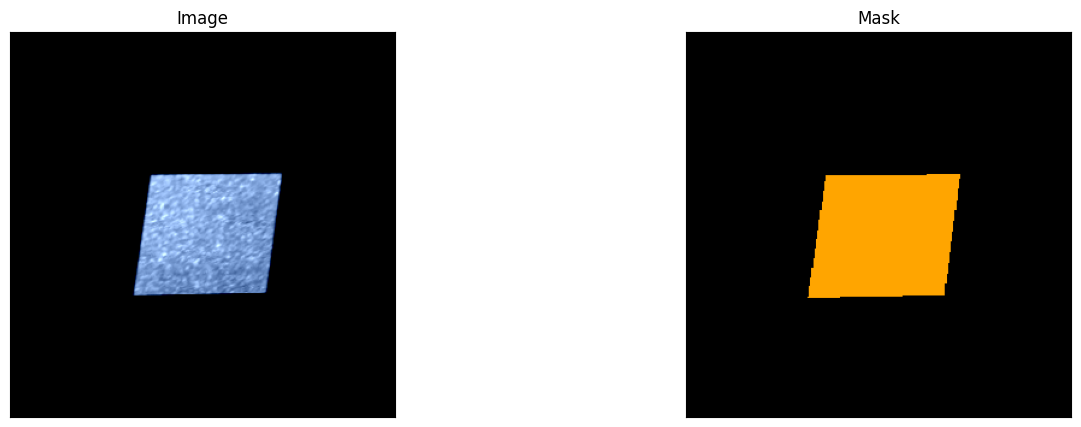

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


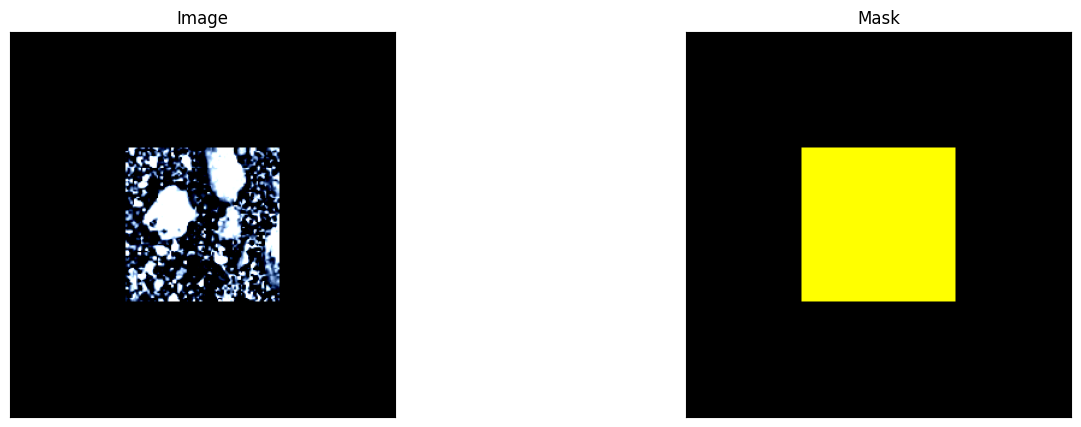

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


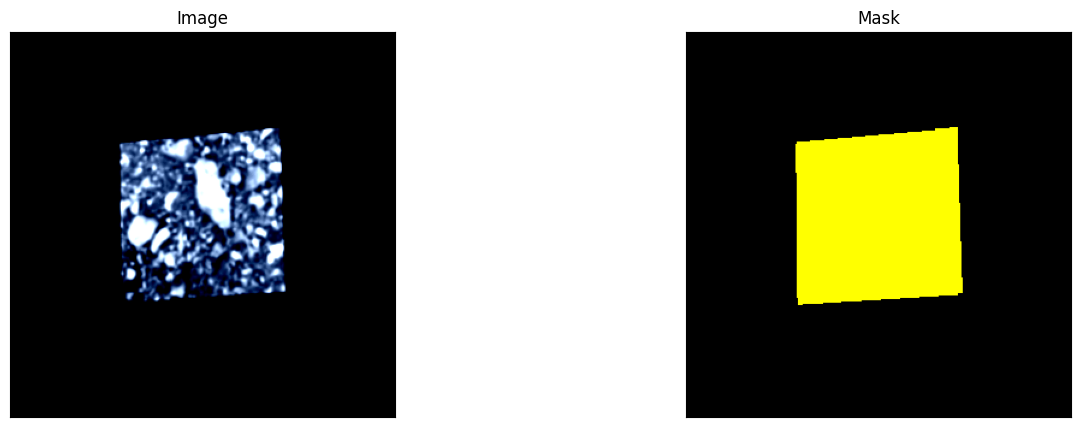

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


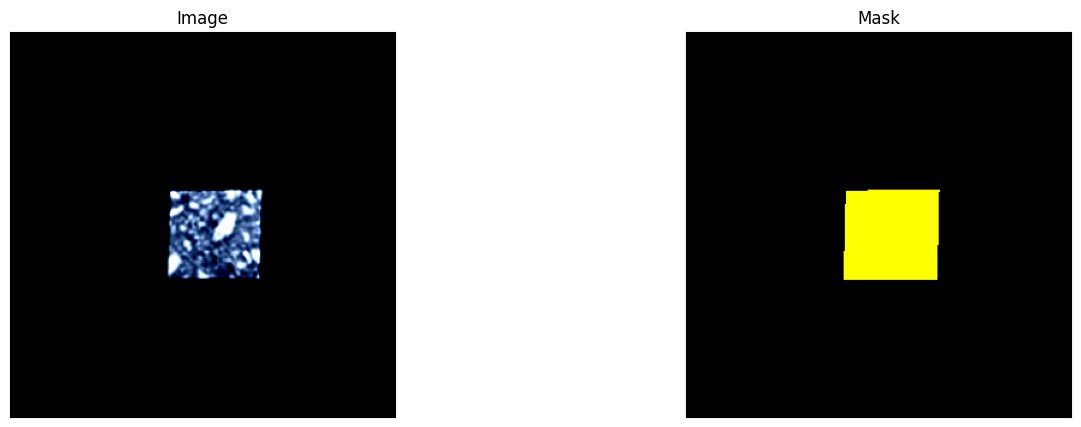

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


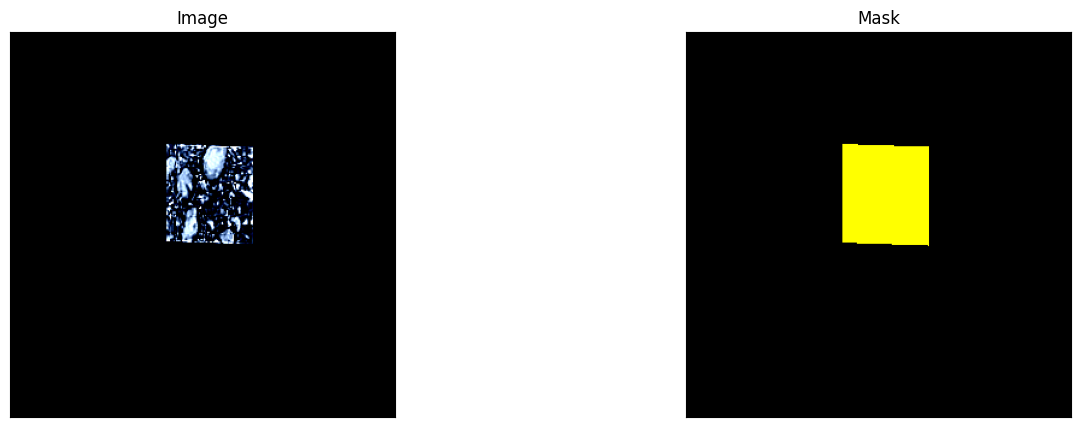

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


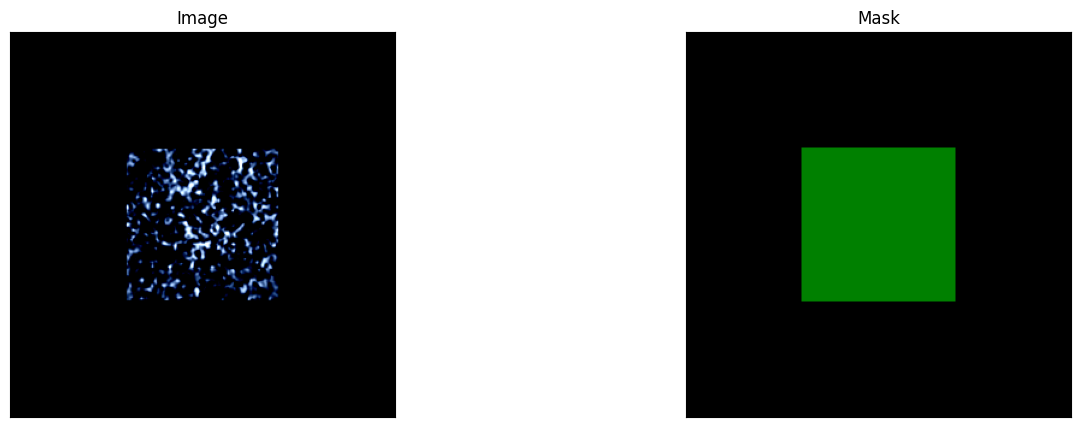

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


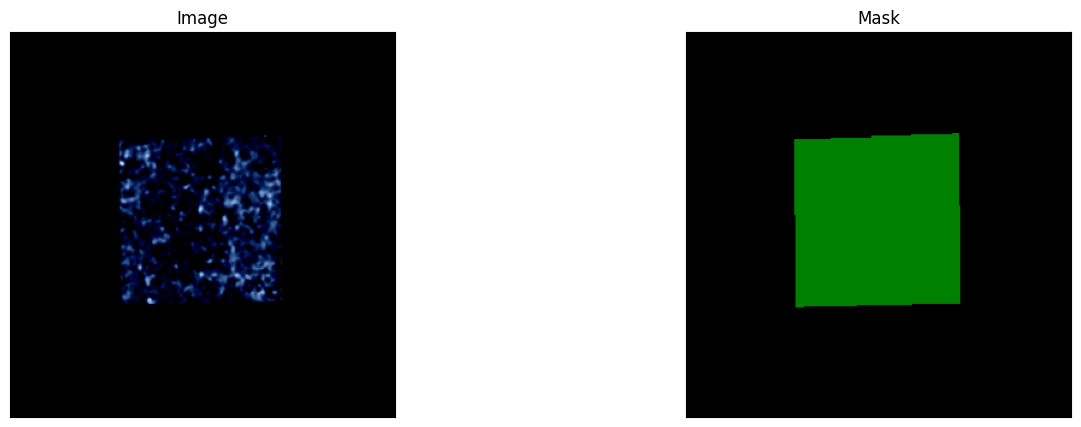

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


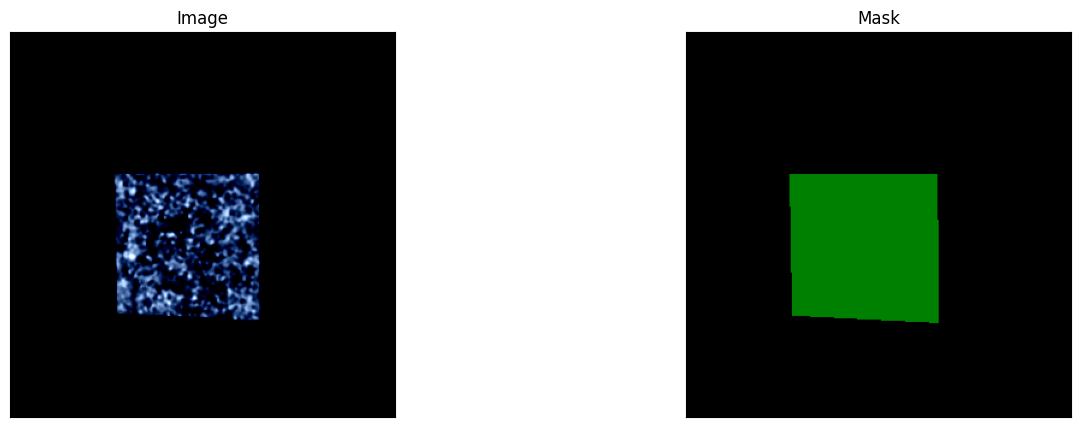

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


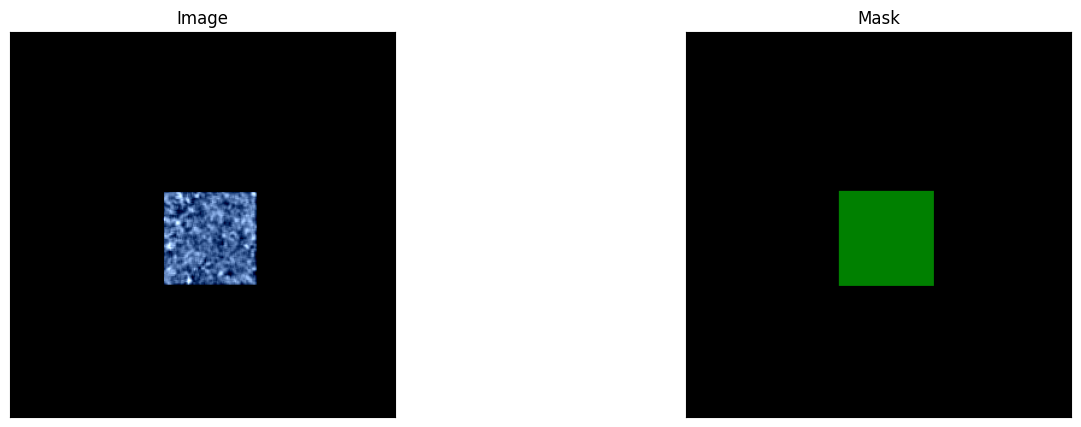

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


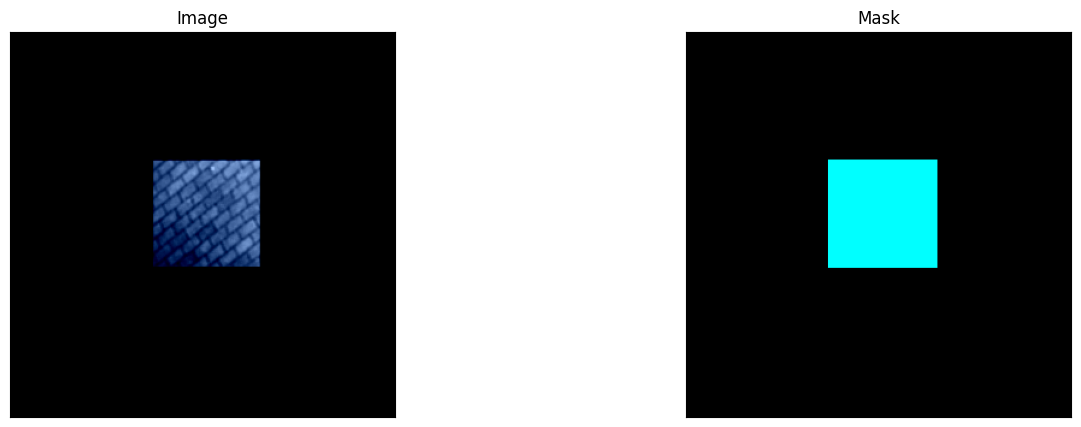

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


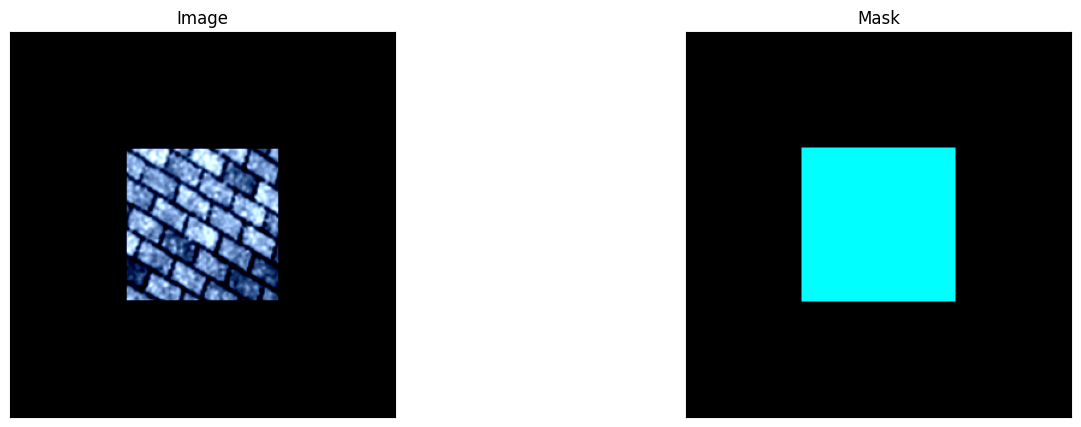

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


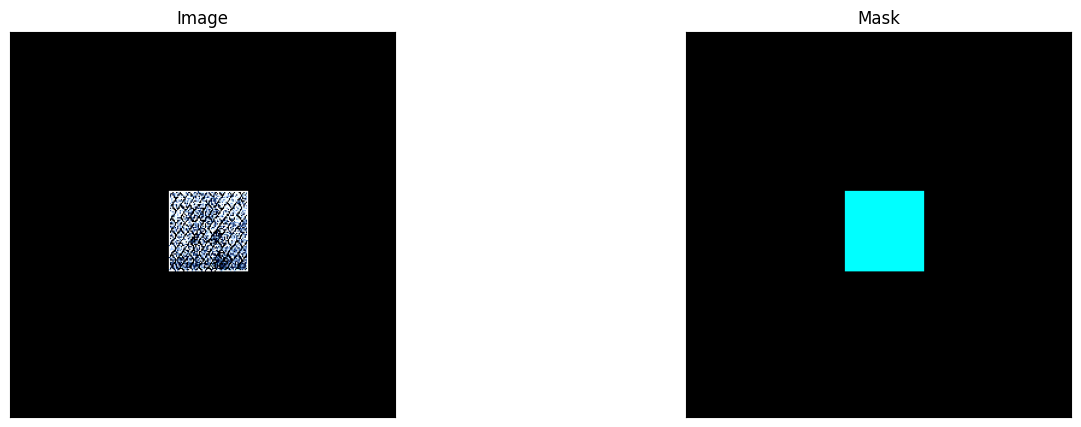

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


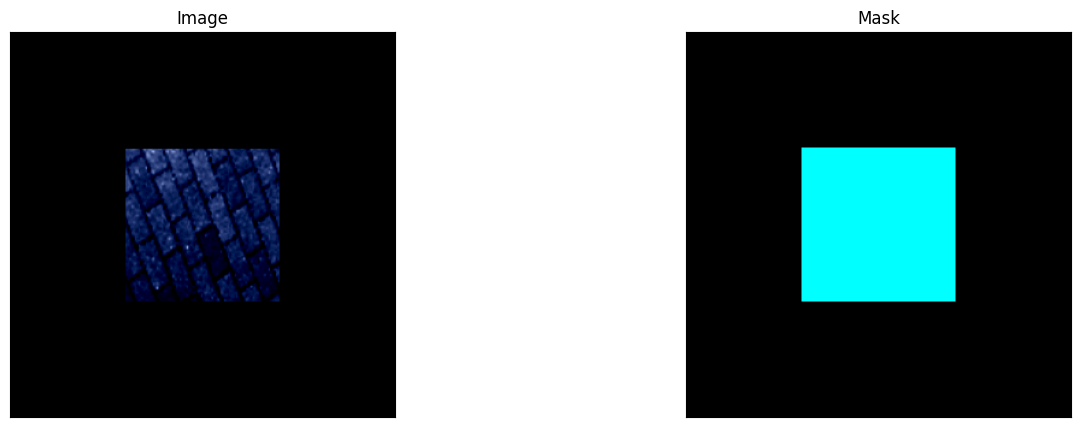

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


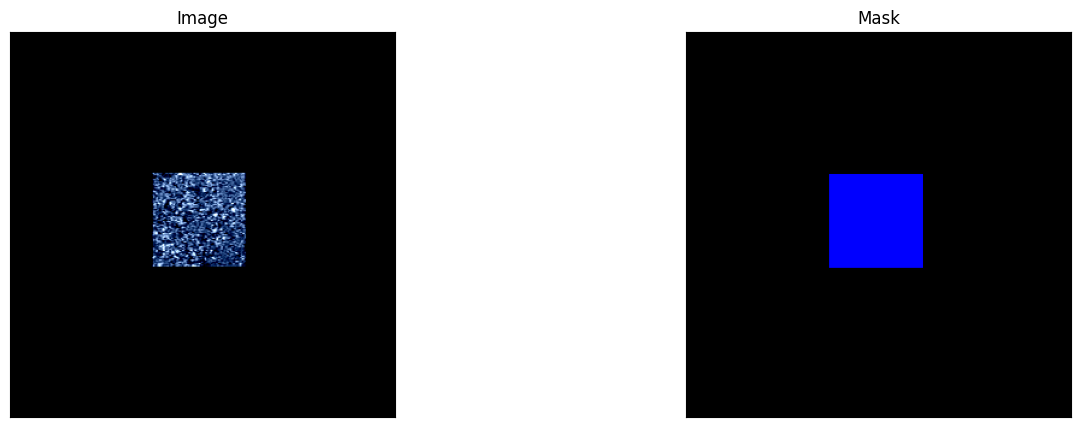

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


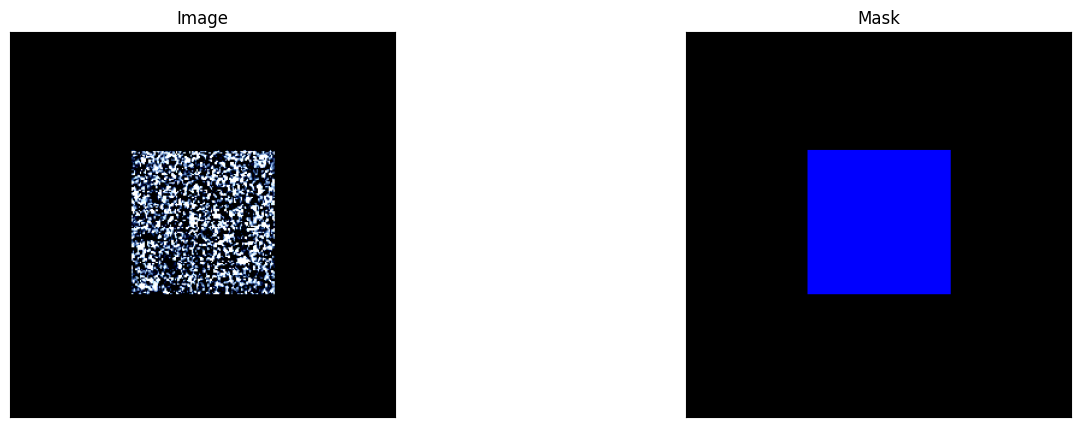

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


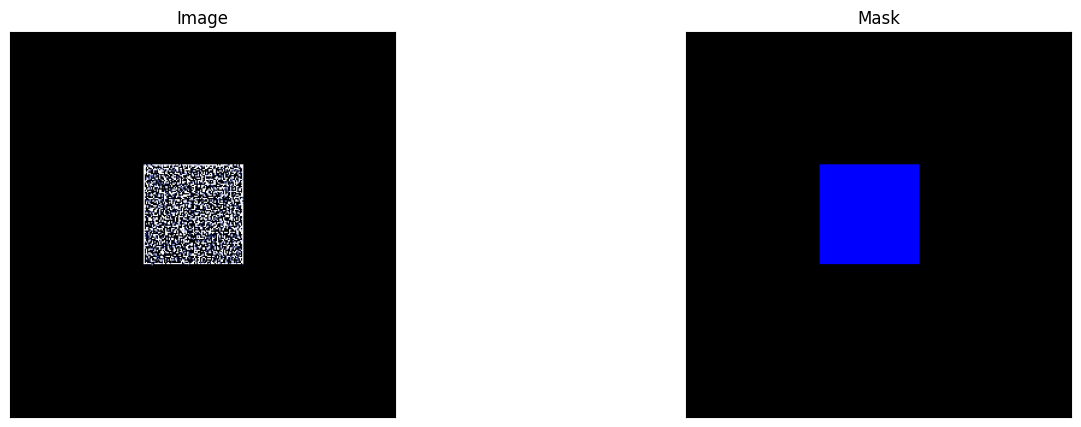

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


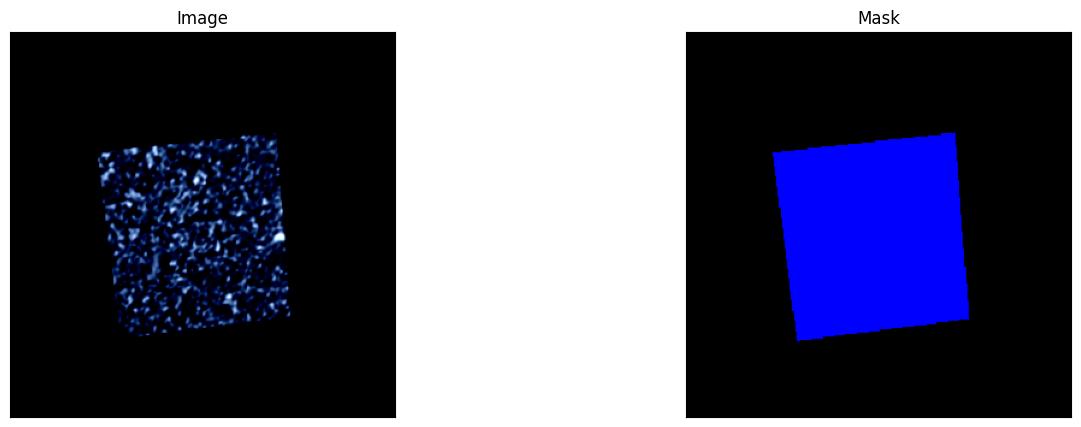

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


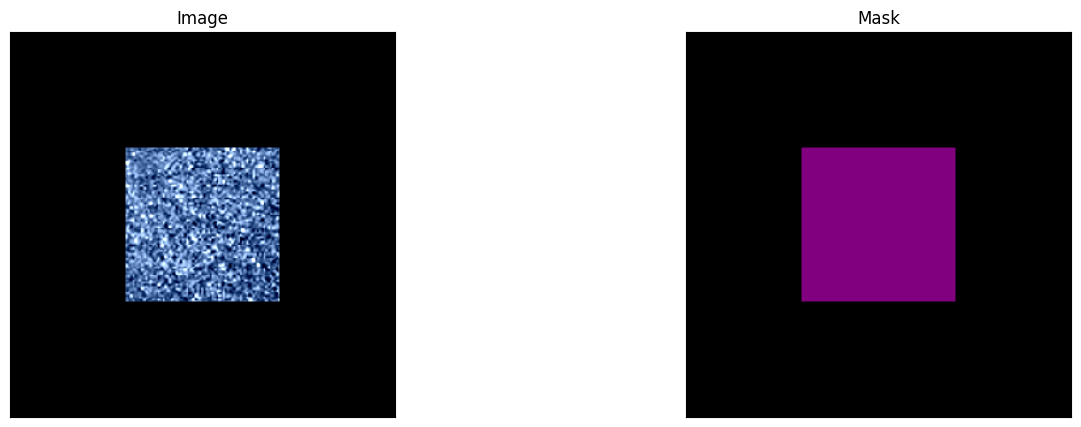

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


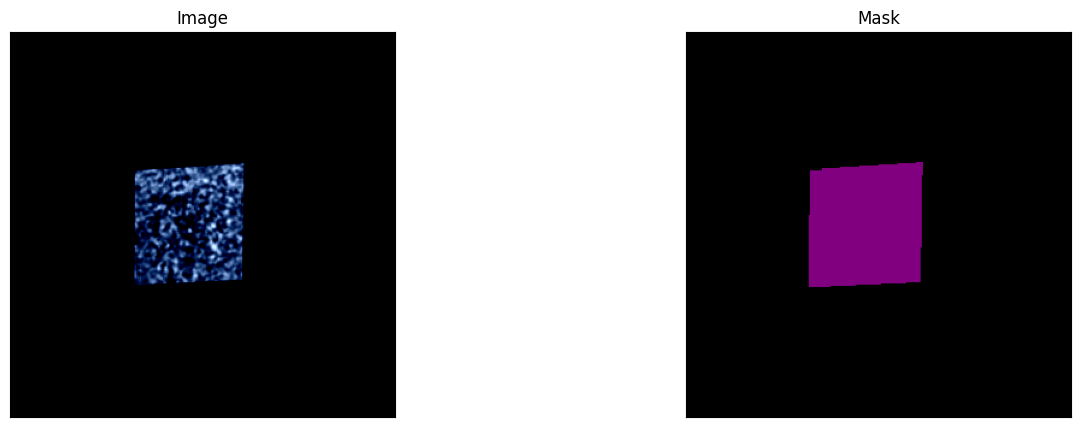

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


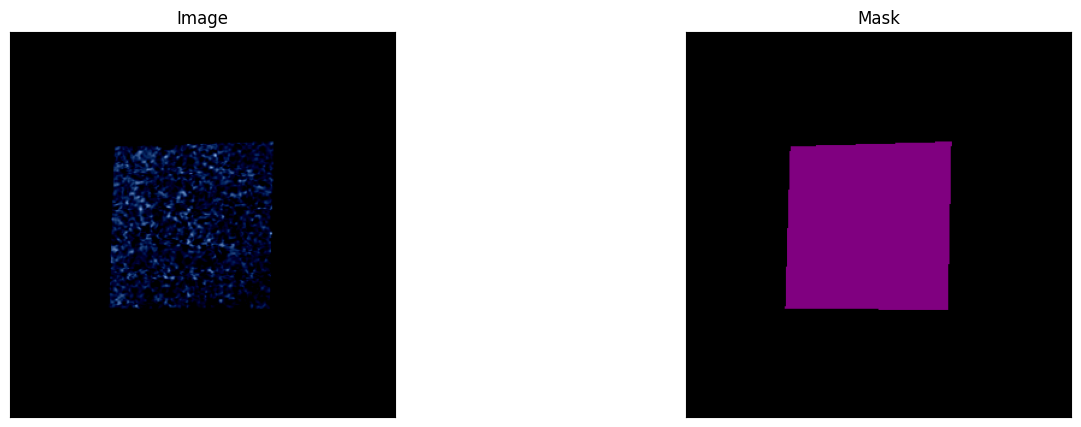

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


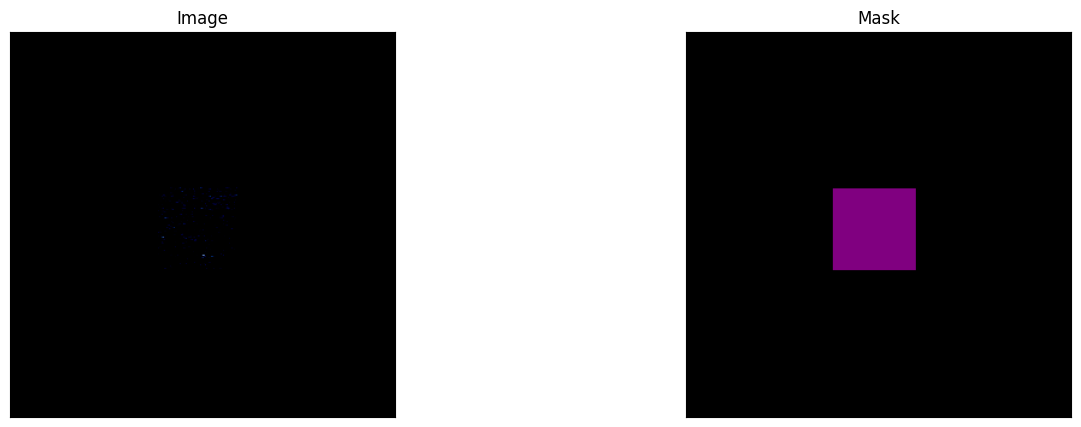

IndexError: list index out of range

In [5]:
for i in range(100):
    image, mask = data_info['train_dataset'][i]
    mask = np.argmax(mask, axis=0)
    mask = Image.fromarray(np.uint8(mask), mode='P')
    mask.putpalette(COLOR_PALETTE)
    visualize(image=image.transpose(1,2,0), mask=mask)

# Training model

In [6]:
# model = smp.Unet(
#     encoder_name=ENCODER, 
#     encoder_weights=ENCODER_WEIGHTS, 
#     classes=len(PREDICT_CLASS), 
#     activation=ACTIVATION,
# )

# model = smp.UnetPlusPlus(
#     encoder_name=ENCODER, 
#     encoder_weights=ENCODER_WEIGHTS, 
#     classes=len(PREDICT_CLASS), 
#     activation=ACTIVATION,
# )

# model = smp.FPN(
#     encoder_name=ENCODER, 
#     encoder_weights=ENCODER_WEIGHTS, 
#     classes=len(CLASSES), 
#     activation=ACTIVATION,
# )

model = smp.PSPNet(
    encoder_name=ENCODER, 
    encoder_weights=ENCODER_WEIGHTS, 
    classes=len(CLASSES), 
    activation=ACTIVATION,
)

# model = smp.DeepLabV3Plus(
#     encoder_name=ENCODER, 
#     encoder_weights=ENCODER_WEIGHTS, 
#     classes=len(CLASSES), 
#     activation=ACTIVATION,
# )
# model = torch.hub.load('pytorch/vision:v0.10.0', 'deeplabv3_resnet50', pretrained=True)


In [7]:
loss = smp.utils.losses.DiceLoss()
metrics = [smp.utils.metrics.IoU(threshold=0.5)]
optimizer = torch.optim.Adam([dict(params=model.parameters(), lr=0.0001)])

train_epoch = smp.utils.train.TrainEpoch(
    model, 
    loss=loss, 
    metrics=metrics, 
    optimizer=optimizer,
    device=DEVICE
)

valid_epoch = smp.utils.train.ValidEpoch(
    model, 
    loss=loss, 
    metrics=metrics, 
    device=DEVICE
)

In [8]:
max_iter = 40
patience = 10

max_score = 0
best_model_path = 'data/models/best_model.pth'
last_model_path = 'data/models/last_model.pth'

for i in range(max_iter):
    print(f"Epoch: {i+1}")
    train_logs = train_epoch.run(data_info["train_dataloader"])
    valid_logs = valid_epoch.run(data_info["val_dataloader"])
    
    # IoUスコアが最高値が更新されればモデルを保存
    if max_score < valid_logs["iou_score"]:
        max_score = valid_logs["iou_score"]
        torch.save(model, best_model_path)
        print("Model saved!")
        early_stop_counter = 0
    else:
        early_stop_counter += 1
        print(f"not improve for {early_stop_counter}Epoch")
        if early_stop_counter==patience:
            print(f"early stop. Max Score {max_score}")
            break

    # 適当なタイミングでlearning rateの変更
    if i == 25:
        optimizer.param_groups[0]["lr"] = 1e-5
        print("Decrease decoder learning rate to 1e-5")
    torch.save(model, last_model_path)

Epoch: 1
valid: 100%|██████████| 3/3 [00:01<00:00,  2.13it/s, dice_loss - 0.7155, iou_score - 0.1665]
Model saved!
Epoch: 2
valid: 100%|██████████| 3/3 [00:01<00:00,  2.22it/s, dice_loss - 0.6122, iou_score - 0.29]  
Model saved!
Epoch: 3
valid: 100%|██████████| 3/3 [00:01<00:00,  1.99it/s, dice_loss - 0.506, iou_score - 0.4532] 
Model saved!
Epoch: 4
valid: 100%|██████████| 3/3 [00:01<00:00,  2.08it/s, dice_loss - 0.4555, iou_score - 0.4787] 
Model saved!
Epoch: 5
valid: 100%|██████████| 3/3 [00:01<00:00,  2.19it/s, dice_loss - 0.495, iou_score - 0.44]    
not improve for 1Epoch
Epoch: 6
valid: 100%|██████████| 3/3 [00:01<00:00,  2.21it/s, dice_loss - 0.5163, iou_score - 0.4157] 
not improve for 2Epoch
Epoch: 7
valid: 100%|██████████| 3/3 [00:01<00:00,  2.08it/s, dice_loss - 0.5069, iou_score - 0.4309] 
not improve for 3Epoch
Epoch: 8
valid: 100%|██████████| 3/3 [00:01<00:00,  2.11it/s, dice_loss - 0.4694, iou_score - 0.4594] 
not improve for 4Epoch
Epoch: 9
valid: 100%|██████████| 3/

# Inferring

In [9]:
best_model = torch.load(best_model_path)
# best_model = torch.load(last_model_path)
# best_model.eval()

In [10]:
test_path = 'data/test'

test_dataset = MaterialDataset(
    get_list_img(f'{test_path}/images/division-1'), 
    get_list_img(f'{test_path}/masks/division-1', 'png'), 
    classes=PREDICT_CLASS,
    # augmentation=get_augmentation(phase), 
    preprocessing=get_preprocessing(preprocessing_fn),
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


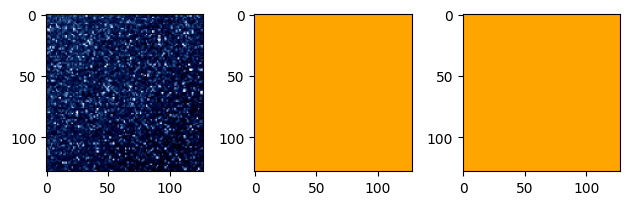

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


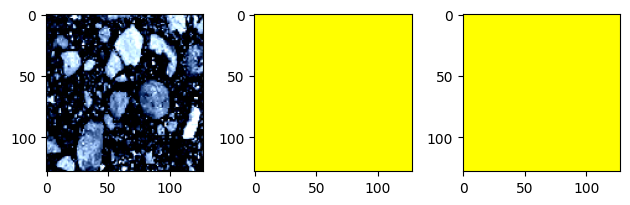

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


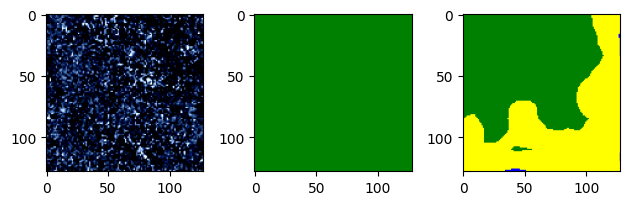

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


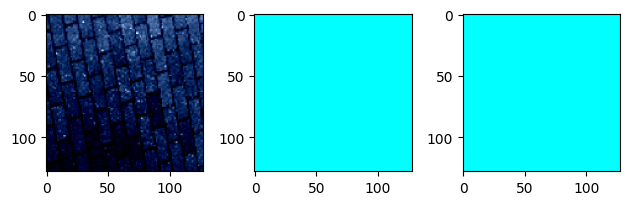

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


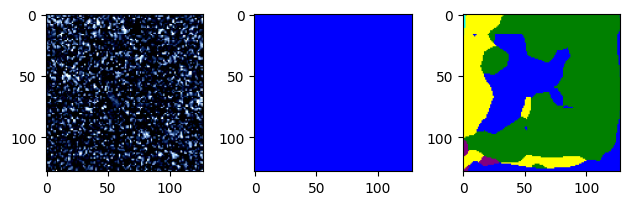

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


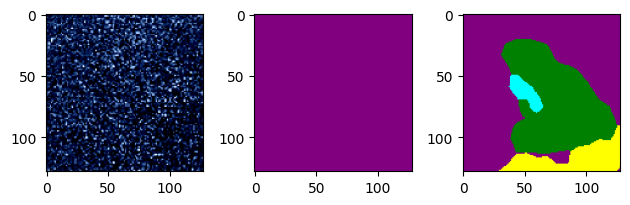

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


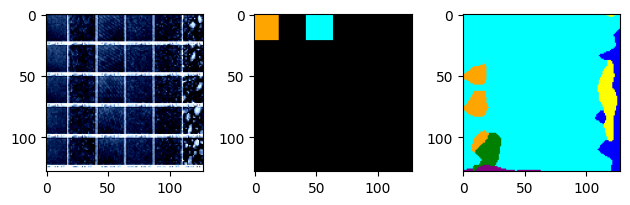

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


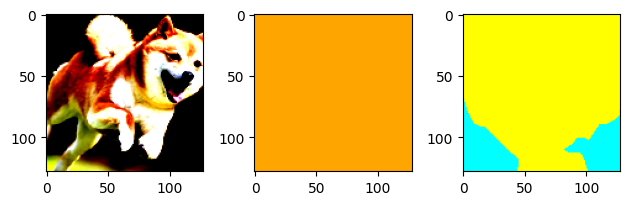

IndexError: list index out of range

In [11]:
for i in range(10):
    img, mask = test_dataset[i]
    
    fig, ax = plt.subplots(1, 3, tight_layout=True)
    ax[0].imshow(img.transpose(1,2,0))
    
    mask = np.argmax(mask, axis=0)
    mask = Image.fromarray(np.uint8(mask), mode="P")
    mask.putpalette(COLOR_PALETTE)
    ax[1].imshow(mask)
    
    x = torch.tensor(img).unsqueeze(0) # 推論のためミニバッチ化：torch.Size([1, 3, 128, 128])
    y = best_model(x.to(DEVICE))
    y = y[0].cpu().detach().numpy()
    y = np.argmax(y, axis=0)
    predict_class_img = Image.fromarray(np.uint8(y), mode="P")
    predict_class_img.putpalette(COLOR_PALETTE)
    ax[2].imshow(predict_class_img)
    
    plt.show()